# Measuring Physical Properties with Line Ratios

Temperature and Density in a nebula


https://web.williams.edu/Astronomy/research/PN/nebulae/exercise3.php

In [20]:
from astropy import units as u
import pylab as pl

In [21]:
# example extracted from the Williams M57 nebula
SII_6731 = 3.7e-14*u.erg/u.s/u.cm**2/u.AA
SII_6716 = 2.5e-14*u.erg/u.s/u.cm**2/u.AA
ratio_SII = SII_6716/SII_6731

This lecture/notebook uses pyneb:

In [22]:
import pyneb as pn

and we focus on the SII state (SI = neutral sulfur, SII = singly-ionized sulfur), which pyneb denotes as:

In [23]:
S2 = pn.Atom('S', 2)

We can use the ratio of emission lines to infer the physical density of the gas.

We'll go into more detail below, but we have to assume a gas temperature.  (with enough measurements, we could measure it)

Typical HII regions are about 10,000 K.  Planetary nebulae can be hotter.

In [24]:
density = S2.getTemDen(ratio_SII, tem=10000, wave1=6716, wave2=6731) * u.cm**-3
density

<Quantity 2887.86235441 1 / cm3>

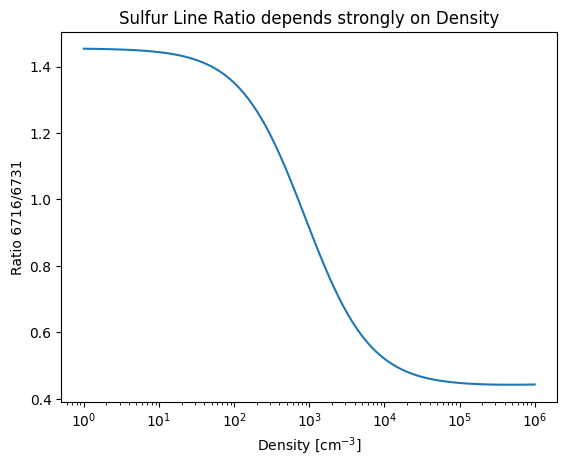

In [25]:
densities = np.geomspace(1, 1e6, 100)
emi_6716 = S2.getEmissivity(tem=1e4, den=densities, lev_i=3, lev_j=1)
emi_6731 = S2.getEmissivity(tem=1e4, den=densities, lev_i=2, lev_j=1)
pl.plot(densities, emi_6716/emi_6731)
pl.xscale('log')
pl.xlabel("Density [cm$^{-3}$]");
pl.ylabel("Ratio 6716/6731");
pl.title("Sulfur Line Ratio depends strongly on Density");

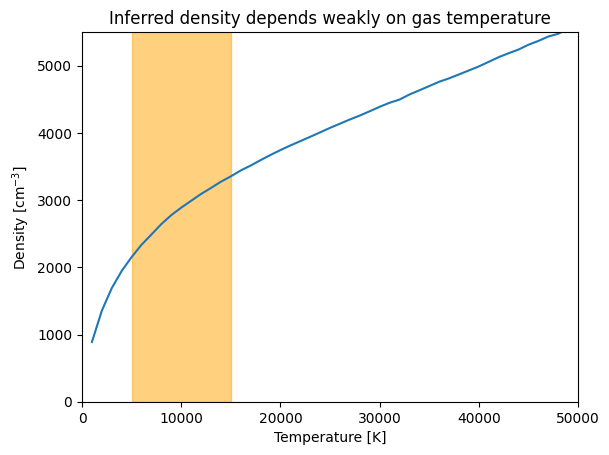

In [26]:
temperatures = np.linspace(1000, 50000)
densities = np.array([S2.getTemDen(ratio_SII, tem=tem, wave1=6716, wave2=6731) for tem in temperatures])
pl.plot(temperatures, densities)
pl.fill_betweenx([0, densities.max()], 5000, 15000, zorder=-1, color='orange', alpha=0.5)
pl.axis([0,50000,0,5500]);
pl.xlabel("Temperature [K]")
pl.ylabel("Density [cm$^{-3}$]");
pl.title("Inferred density depends weakly on gas temperature");

## Sulfur Lines are density-sensitive

They come from different upper state levels, $^2$D$_{5/2}$ and $^2$D$_{3/2}$, that are separated by a small energy, 4 meV (46 K).  


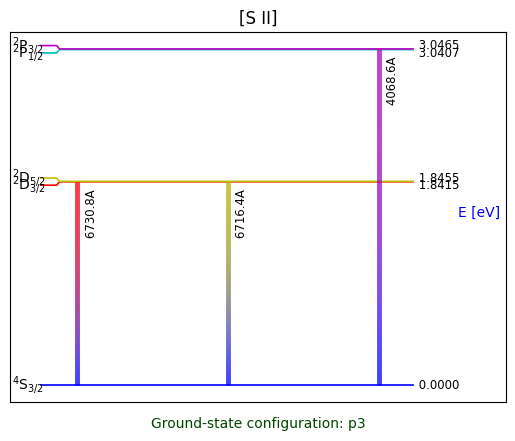

In [27]:
S2.plotGrotrian(tem=1e4, den=2e3, thresh_int=1e-1, unit = 'eV')

pyneb calculates these numbers:

In [28]:
# get the numbers of the transitions as they're stored in the grids
S2.getTransition(6716),  S2.getTransition(6731)

((np.int64(3), np.int64(1)), (np.int64(2), np.int64(1)))

In [29]:
# inspect the energy levels
S2.getEnergy(3, unit='eV'),  S2.getEnergy(2, unit='eV')

(np.float64(1.8454712358827372), np.float64(1.8415297783898092))

In [30]:
dE = S2.getEnergy(3, unit='eV') -  S2.getEnergy(2, unit='eV')
(dE*u.eV).to(u.K, u.temperature_energy())

<Quantity 45.7387149 K>

These transitions, [SII $\lambda$6716] & [SII $\lambda$6731], are _forbidden_, written as [S II] (the square braces on both side means 'forbidden') 

...which means they have a very low likelihood of occurring compared to 'allowed' transitions.  

In other words, they have a relatively long lifetime.

In [31]:
aval_6716 = S2.AtomData.getA(3, 1)*u.s**-1
aval_6731 = S2.AtomData.getA(2, 1)*u.s**-1
1/aval_6731, 1/aval_6716

(<Quantity 1060.33294454 s>, <Quantity 3525.96875992 s>)

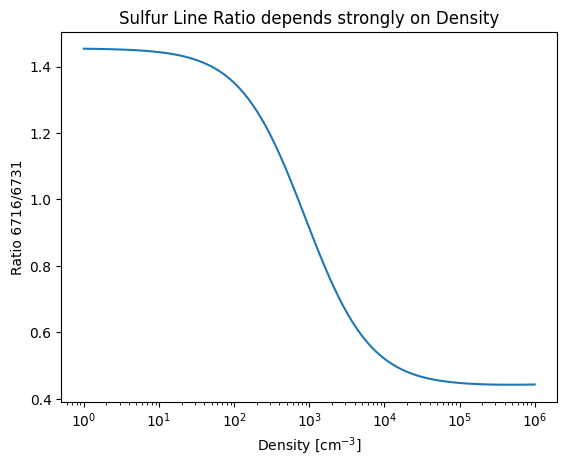

In [32]:
densities = np.geomspace(1, 1e6, 100)
emi_6716 = S2.getEmissivity(tem=1e4, den=densities, lev_i=3, lev_j=1)
emi_6731 = S2.getEmissivity(tem=1e4, den=densities, lev_i=2, lev_j=1)
pl.plot(densities, emi_6716/emi_6731)
pl.xscale('log')
pl.xlabel("Density [cm$^{-3}$]");
pl.ylabel("Ratio 6716/6731");
pl.title("Sulfur Line Ratio depends strongly on Density");

#### Two extremes

1. Low density

If there are very few collisions, every collision results in 1 photon.

The ratio 6716/6731 depends only on the _statistical weight_ of the atoms - basically, quantum physics that says how likely an electron is to be in the  $^2$D$_{5/2}$ and $^2$D$_{3/2}$ states, and that sets the line ratio.

2. High density

If there are lots of collisions, every spontaneous emission of 1 photon is balanced by many collisional excitations.  In other words, the levels are kept in an equilibrium state.

The number of atoms in each of the  $^2$D$_{5/2}$ and $^2$D$_{3/2}$ states is fixed, but $^2$D$_{3/2}$ has a 3x shorter lifetime (spontaneous emission happens 3x faster), so it will produce 3x more photons than in case 1.

## Between

The interesting case is between, where the line ratio depends on density.

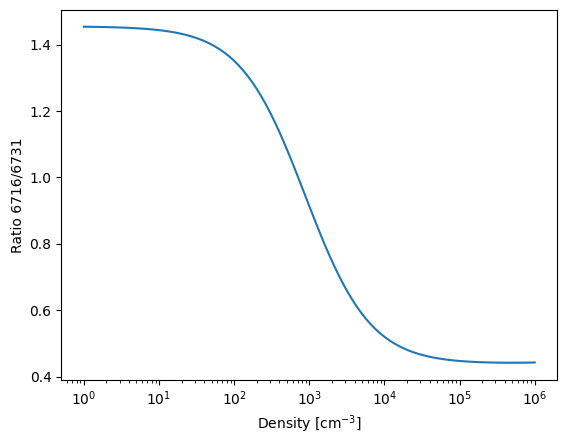

In [33]:
densities = np.geomspace(1, 1e6, 100)
emi_6716 = S2.getEmissivity(tem=1e4, den=densities, lev_i=3, lev_j=1)
emi_6731 = S2.getEmissivity(tem=1e4, den=densities, lev_i=2, lev_j=1)
pl.plot(densities, emi_6716/emi_6731)
pl.xscale('log')
pl.xlabel("Density [cm$^{-3}$]");
pl.ylabel("Ratio 6716/6731");

# Not all atoms have this behavior

We can observe the Nitrogen atom in its first ionized NII state, but for NII, the _lower_ level is split.

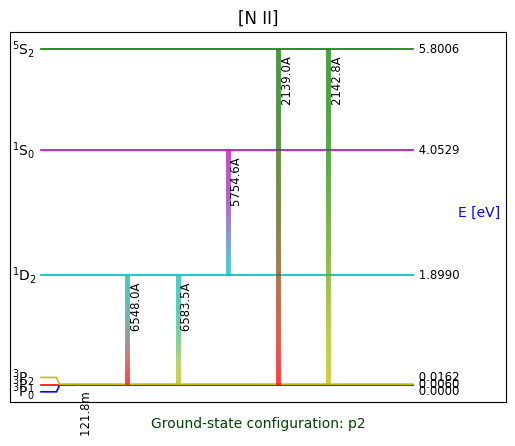

In [34]:
N2 = pn.Atom('N',2)
N2.plotGrotrian(tem=1e4, den=2e3, thresh_int=1e-3, unit = 'eV')

in this case, the ratio of 6548/6583 is governed _only_ by quantum physics, not by local properties - so we can't use it to learn anything about the gas, unfortunately.

However, if we also measure the 5754 angstrom line, we can!

In [35]:
N2.getTemDen(int_ratio=0.05, den=3000, wave1=5755, wave2=6548)

np.float64(10222.512951060315)

In [36]:
# get the numbers of the transitions as they're stored in the grids
N2.getTransition(5755),  N2.getTransition(6548)

((np.int64(5), np.int64(4)), (np.int64(4), np.int64(2)))

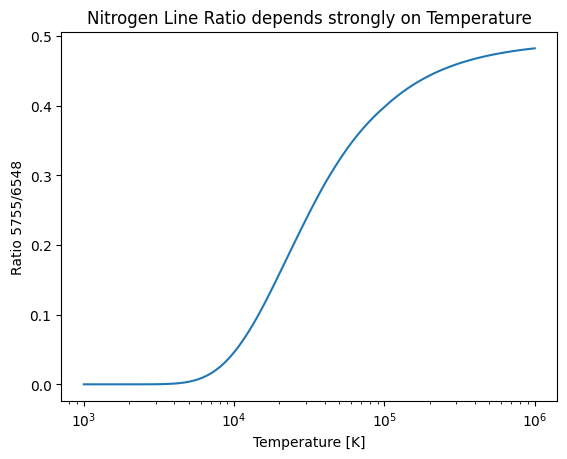

In [37]:
tems = np.geomspace(1e3, 1e6, 100)
emi_5755 = N2.getEmissivity(tem=tems, den=2e3, lev_i=5, lev_j=4)
emi_6548 = N2.getEmissivity(tem=tems, den=2e3, lev_i=4, lev_j=2)
pl.plot(tems, emi_5755/emi_6548)
pl.xscale('log')
pl.xlabel("Temperature [K]");
pl.ylabel("Ratio 5755/6548");
pl.title("Nitrogen Line Ratio depends strongly on Temperature");

# In principle, you can find the jointly best temperature/density

But in practice, there are some challenges to overcome:

In [38]:
diags = pn.Diagnostics()
diags.getCrossTemDen('[NII] 5755/6548', '[SII] 6731/6716', value_tem=0.05, start_den=3000, value_den=ratio_SII)

/Users/adam/mambaforge/envs/py312/lib/python3.12/site-packages/pyneb/core/pynebcore.py:2145: RuntimeWarning: overflow encountered in power
  populations = self.getPopulations(tem, pow(10., x))
/Users/adam/mambaforge/envs/py312/lib/python3.12/site-packages/numpy/_core/numeric.py:983: RuntimeWarning: invalid value encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)


(nan, nan)